# **IMPORTING ALL LIBRARIES**

In [ ]:
import torch
import torch.optim as optim
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
from torchsummary import summary
import torch.nn as nn

# **CHECKING IF GPU IS AVAILABLE**

In [ ]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('Training on CPU')
else:
    print('Training on GPU')

Training on GPU


# Loading DataSet and Nomalizing it and split to train, validate and test

In [ ]:
# Number of samples per batch to load
batch_size = 16
# percentage of training set to use as validation
valid_size = 0.2

# Noamlizing Data
transform = transforms.Compose([
    transforms.Resize((227,227)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
        std=[0.2023, 0.1994, 0.2010],)
    ])

# train and test dataset
train_data = datasets.CIFAR10('data', train=True,
                              download=True, transform=transform)
test_data = datasets.CIFAR10('data', train=False,
                             download=True, transform=transform)

# Training indices used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# Samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# Data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=valid_sampler)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

# classes in image
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

100%|██████████| 170498071/170498071 [1:16:24<00:00, 37191.88it/s]  


Extracting data\cifar-10-python.tar.gz to data
Files already downloaded and verified


# Using Matplotlib to visualize Data

In [ ]:
%matplotlib inline

# function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

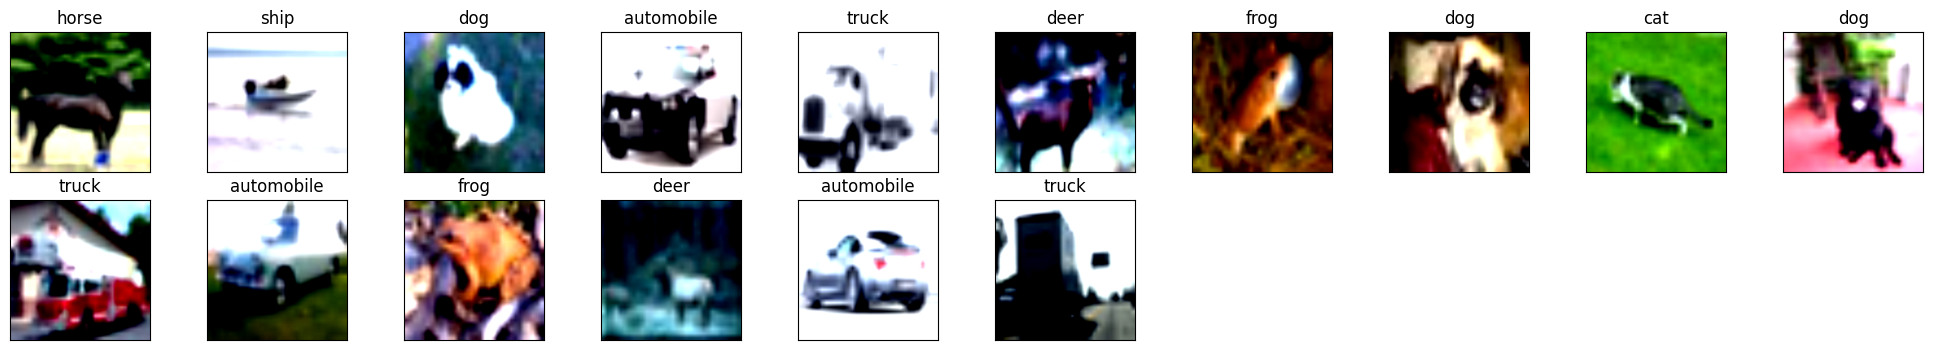

In [ ]:
# obtaining one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

# plot the images in the batch with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# displaying images
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

# **Defining Architecture of AlexNet**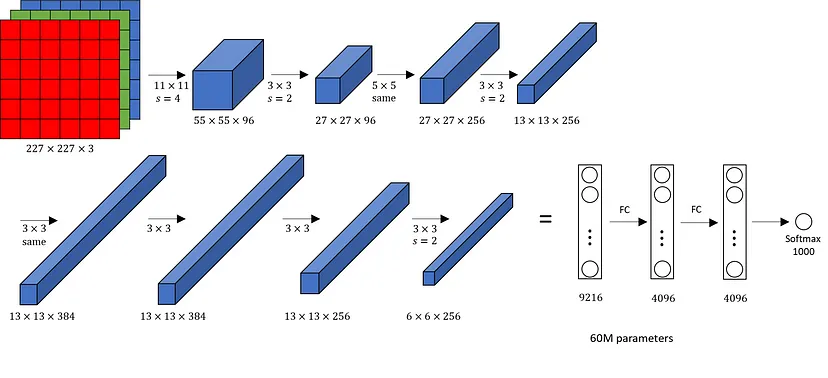

In [ ]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

model = AlexNet()
print(model)

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

# Summary of model

In [ ]:
summary(model, input_size = images.shape[1:], batch_size = 16)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [16, 64, 56, 56]          23,296
              ReLU-2           [16, 64, 56, 56]               0
         MaxPool2d-3           [16, 64, 27, 27]               0
            Conv2d-4          [16, 192, 27, 27]         307,392
              ReLU-5          [16, 192, 27, 27]               0
         MaxPool2d-6          [16, 192, 13, 13]               0
            Conv2d-7          [16, 384, 13, 13]         663,936
              ReLU-8          [16, 384, 13, 13]               0
            Conv2d-9          [16, 256, 13, 13]         884,992
             ReLU-10          [16, 256, 13, 13]               0
           Conv2d-11          [16, 256, 13, 13]         590,080
             ReLU-12          [16, 256, 13, 13]               0
        MaxPool2d-13            [16, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [16, 25

# Training the model

In [ ]:
num_classes = 10
num_epochs = 20
batch_size = 16
learning_rate = 0.01

if train_on_gpu:
  model = AlexNet(num_classes).cuda()
else :
  model = AlexNet(num_classes)


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.Adam(model.parameters())


# Train the model
total_step = len(train_loader)

In [ ]:
total_step = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the device
        if train_on_gpu:
          images = images.cuda()
          labels = labels.cuda()
        else:
          images = images
          labels = labels
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Validation
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in valid_loader:
            images = images.cuda()
            labels = labels.cuda()
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del images, labels, outputs

        print('Accuracy of the network on the {} validation images: {} %'.format(5000, 100 * correct / total))

Epoch [1/20], Step [2500/2500], Loss: 2.3023
Accuracy of the network on the 5000 validation images: 13.25 %
Epoch [2/20], Step [2500/2500], Loss: 2.3011
Accuracy of the network on the 5000 validation images: 10.53 %
Epoch [3/20], Step [2500/2500], Loss: 2.1834
Accuracy of the network on the 5000 validation images: 18.62 %
Epoch [4/20], Step [2500/2500], Loss: 2.0346
Accuracy of the network on the 5000 validation images: 28.2 %
Epoch [5/20], Step [2500/2500], Loss: 2.0994
Accuracy of the network on the 5000 validation images: 34.93 %
Epoch [6/20], Step [2500/2500], Loss: 2.1736
Accuracy of the network on the 5000 validation images: 38.55 %
Epoch [7/20], Step [2500/2500], Loss: 1.9904
Accuracy of the network on the 5000 validation images: 38.57 %
Epoch [8/20], Step [2500/2500], Loss: 1.9678
Accuracy of the network on the 5000 validation images: 43.07 %
Epoch [9/20], Step [2500/2500], Loss: 1.9351
Accuracy of the network on the 5000 validation images: 47.91 %
Epoch [10/20], Step [2500/250

# Saving the model in .pt file

In [ ]:
torch.save(model.state_dict(), 'model-LeNet.pt')

In [ ]:
model.load_state_dict(torch.load("content/model-LeNet.pt"))

<All keys matched successfully>

# Finding accuracy of model

In [ ]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.cuda()
        labels = labels.cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        del images, labels, outputs

    print('Accuracy of the network on the {} test images: {} %'.format(10000, 100 * correct / total))

Accuracy of the network on the 10000 test images: 63.24 %


In [ ]:
model.load_state_dict(torch.load('content/model-LeNet.pt'))

# Testing the model

In [ ]:
def evaluate(model, state_dict_file):

    model.load_state_dict(torch.load(state_dict_file))
    # track test loss
    test_loss = 0.0
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))

    model.eval()
    # iterate over test data
    for data, target in test_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        criterion = nn.CrossEntropyLoss()
        loss = criterion(output, target)
        # update test loss
        test_loss += loss.item()*data.size(0)
        # convert output probabilities to predicted class
        _, pred = torch.max(output, 1)
        # compare predictions to true label
        correct_tensor = pred.eq(target.data.view_as(pred))
        correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
        # calculate test accuracy for each object class
        for i in range(num_classes):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

    # average test loss
    test_loss = test_loss/len(test_loader.dataset)
    print('Test Loss: {:.6f}\n'.format(test_loss))

    for i in range(10):
        if class_total[i] > 0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                classes[i], 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

    print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
        100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)))

evaluate(model, 'content/model-LeNet.pt')

Test Loss: 1.806359

Test Accuracy of airplane: 66% (409/619)
Test Accuracy of automobile: 86% (524/609)
Test Accuracy of  bird: 68% (441/646)
Test Accuracy of   cat: 56% (348/617)
Test Accuracy of  deer: 42% (274/652)
Test Accuracy of   dog: 52% (330/625)
Test Accuracy of  frog: 46% (268/580)
Test Accuracy of horse: 77% (496/643)
Test Accuracy of  ship: 86% (554/641)
Test Accuracy of truck: 73% (457/618)

Test Accuracy (Overall): 65% (4101/6250)
